# Project 1
- **Team Members**: Chika Ozodiegwu, Kelsey Wyatt, Libardo Lambrano, Kurt Pessa

![](Images/florida_covid19_data.jpg)

### Data set used:
* https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data


In [1]:
import requests
import pandas as pd
import io
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import JSON

df = pd.read_csv("Resources/Florida_COVID19_Case_Line_Data_new.csv")

df.head(3)

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 01:04:23+00,2020/07/15 05:00:00+00,90
1,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 19:56:31+00,2020/07/15 05:00:00+00,279
2,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,NaN,NaN,NaN,Yes,Yes,2020/07/15 05:00:00+00,2020/07/15 15:03:33+00,2020/07/15 05:00:00+00,339


In [2]:
#Clean dataframe

new_csv_data_df = df[['ObjectId', "County",'Age',"Age_group", "Gender", "Jurisdiction", "Travel_related", "Hospitalized","Case1"]]
new_csv_data_df.head()

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Case1
0,90,Hillsborough,21.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
1,279,Palm Beach,65.0,65-74 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
2,339,Hendry,23.0,15-24 years,Female,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
3,1606,Leon,19.0,15-24 years,Male,FL resident,Unknown,NaN,2020/07/15 05:00:00+00
4,1873,Santa Rosa,21.0,15-24 years,Female,FL resident,No,NO,2020/07/15 05:00:00+00


In [3]:
#Create new csv

new_csv_data_df.to_csv ("new_covid_dataframe.csv")

# There is no change in hospitalizations since reopening
### Research Question to Answer:
* “There is no change in hospitalizations since reopening.” 

### Part 1: Six (6) Steps for Hypothesis Testing

<details><summary> click to expand  </summary>

#### 1. Identify
- **Populations** (divide Hospitalization data in two groups of data):
    1. Prior to opening
    2. After opening  
* Decide on the **date**:
    * May 4th - restaurants opening to 25% capacity
    * June  (Miami opening beaches)
- Distribution:
    * Distribution

#### 2. State the hypotheses
- **H0**: There is no change in hospitalizations after Florida has reopened
- **H1**: There is a change in hospitalizations after Florida has reopened

#### 3. Characteristics of the comparison distribution
- Population means, standard deviations

#### 4. Critical values
- p = 0.05
- Our hypothesis is nondirectional so our hypothesis test is **two-tailed**

#### 5. Calculate

#### 6. Decide!
    
</details>

### Part 2: Visualization

In [4]:
#Calculate total number of cases 
Total_covid_cases = new_csv_data_df["ObjectId"].nunique()
Total_covid_cases = pd.DataFrame({"Total Number of Cases": [Total_covid_cases]})
Total_covid_cases

,Total Number of Cases
0,315775


In [5]:
#Total number of cases per county
total_cases_county = new_csv_data_df.groupby(by="County").count().reset_index().loc[:,["County","Case1"]]
total_cases_county.rename(columns={"County": "County", "Case1": "Total Cases"})

,County,Total Cases
0,Alachua,2397
1,Baker,202
2,Bay,1602
3,Bradford,173
4,Brevard,3804
...,...,...
63,Unknown,372
64,Volusia,4572
65,Wakulla,223
66,Walton,693


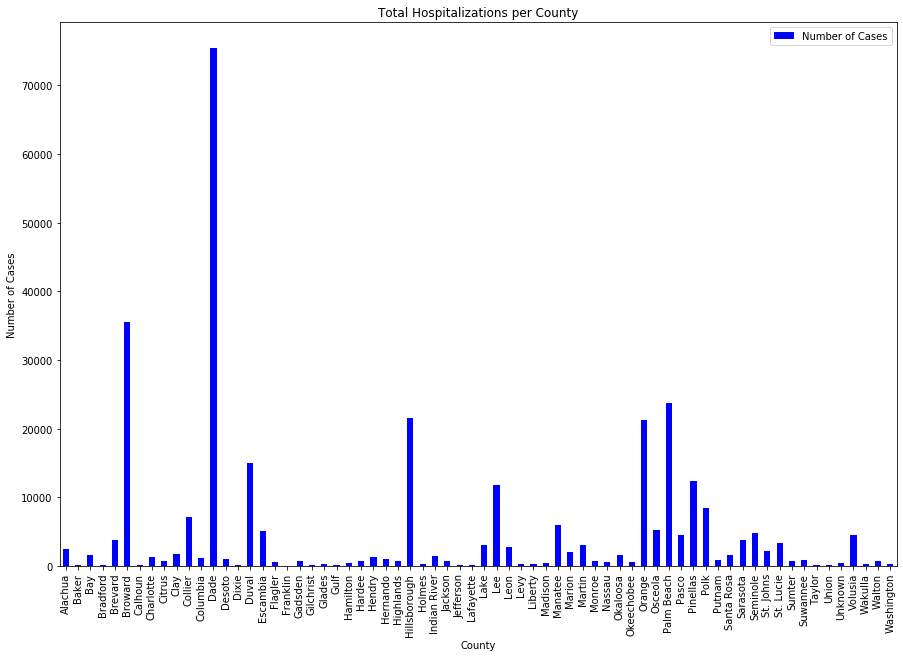

In [6]:
#Create bar chart for total cases per county
total_cases_county.plot(kind='bar',x='County',y='Case1', title ="Total Cases per County", figsize=(15, 10), color="blue")

plt.title("Total Hospitalizations per County")
plt.xlabel("County")
plt.ylabel("Number of Cases")
plt.legend(["Number of Cases"])
plt.show()

In [7]:
#Calculate top 10 counties with total cases
top10_county_cases = total_cases_county.sort_values(by="Case1",ascending=False).head(10)
top10_county_cases["Rank"] = np.arange(1,11)
top10_county_cases.set_index("Rank").style.format({"Case1":"{:,}"})

,County,Case1
Rank,,
1,Dade,"75,425"
2,Broward,"35,566"
3,Palm Beach,"23,711"
4,Hillsborough,"21,557"
5,Orange,"21,299"
6,Duval,"14,992"
7,Pinellas,"12,368"
8,Lee,"11,721"
9,Polk,"8,498"


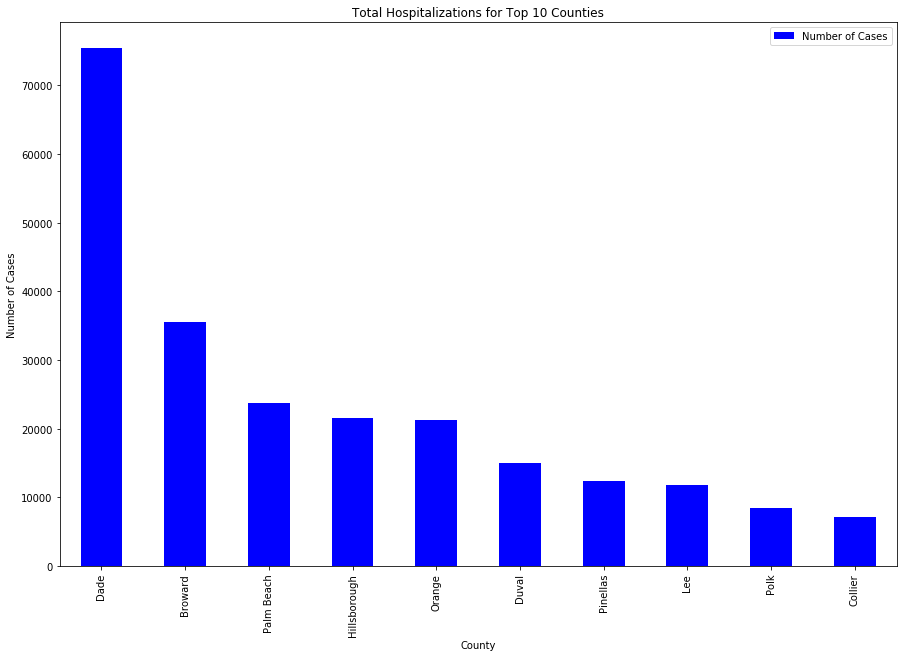

In [8]:
#Create bar chart for total cases for top 10 counties
top10_county_cases.plot(kind='bar',x='County',y='Case1', title ="Total Cases for Top 10 Counties", figsize=(15, 10), color="blue")

plt.title("Total Hospitalizations for Top 10 Counties")
plt.xlabel("County")
plt.ylabel("Number of Cases")
plt.legend(["Number of Cases"])
plt.show()

In [9]:
#Total number of cases by gender
total_cases_gender = new_csv_data_df.groupby(by="Gender").count().reset_index().loc[:,["Gender","Case1"]]
total_cases_gender.rename(columns={"Gender": "Gender", "Case1": "Total Cases"})

,Gender,Total Cases
0,Female,160368
1,Male,153317
2,Unknown,2090


Text(0.5, 1.0, 'Total Number of Cases in Males vs. Females')

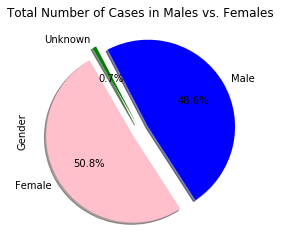

In [10]:
#Create pie chart for total number of cases by gender
total_cases_gender = new_csv_data_df["Gender"].value_counts()

colors=["pink", "blue", "green"]

explode=[0.1,0.1,0.1]

total_cases_gender.plot.pie(explode=explode,colors=colors, autopct="%1.1f%%", shadow=True, subplots=True, startangle=120);

plt.title("Total Number of Cases in Males vs. Females")

In [11]:
#Filter data to show only cases that include hospitalization
filt = new_csv_data_df["Hospitalized"] == "YES"
df = new_csv_data_df[filt]
df

,ObjectId,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Hospitalized,Case1
11,12600,Broward,59.0,55-64 years,Female,FL resident,No,YES,2020/07/15 05:00:00+00
13,13705,Escambia,60.0,55-64 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00
144,33647,Putnam,66.0,65-74 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00
215,44046,Dade,43.0,35-44 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00
354,56860,Volusia,66.0,65-74 years,Male,FL resident,No,YES,2020/07/15 05:00:00+00
...,...,...,...,...,...,...,...,...,...
315764,11932,Lee,77.0,75-84 years,Male,FL resident,Yes,YES,2020/03/07 05:00:00+00
315765,11933,Broward,65.0,65-74 years,Male,FL resident,Yes,YES,2020/03/07 05:00:00+00
315766,11936,Santa Rosa,71.0,65-74 years,Male,FL resident,Yes,YES,2020/03/05 05:00:00+00
315767,11601,Leon,59.0,55-64 years,Female,Not diagnosed/isolated in FL,Yes,YES,2020/03/04 05:00:00+00


In [12]:
#Calculate total number of hospitalizations
pd.DataFrame({
    "Total Hospitalizations (Florida)" : [df.shape[0]]
}).style.format("{:,}")

,Total Hospitalizations (Florida)
0,"20,154"


In [13]:
#Total number of hospitalization for all counties
hospitalizations_county = df.groupby(by="County").count().reset_index().loc[:,["County","Hospitalized"]]
hospitalizations_county 

,County,Hospitalized
0,Alachua,115
1,Baker,22
2,Bay,59
3,Bradford,19
4,Brevard,250
...,...,...
63,Unknown,2
64,Volusia,353
65,Wakulla,12
66,Walton,42


In [ ]:
#Create bar chart for total hospitalizations per county
hospitalizations_county.plot(kind='bar',x='County',y='Hospitalized', title ="Total Hospitalizations per County", figsize=(15, 10), color="blue")

plt.title("Total Hospitalizations per County")
plt.xlabel("County")
plt.ylabel("Number of Hospitalizations")
plt.show()

In [ ]:
#Calculate top 10 counties with hospitalizations
top10_county = hospitalizations_county.sort_values(by="Hospitalized",ascending=False).head(10)
top10_county["Rank"] = np.arange(1,11)
top10_county.set_index("Rank").style.format({"Hospitalized":"{:,}"})

In [ ]:
#Create a bar chart for the top 10 counties with hospitalizations
top10_county.plot(kind='bar',x='County',y='Hospitalized', title ="Total Hospitalizations for the Top 10 Counties", figsize=(15, 10), color="blue")

plt.title("Total Hospitalizations for the Top 10 Counties")
plt.xlabel("County")
plt.ylabel("Number of Hospitalizations")
plt.show()

In [ ]:
#Average number of hospitalization by county (Not done yet) (Kelsey)
average = hospitalizations_county["Hospitalized"].mean()
average

In [ ]:
#Filter data to show only cases that include hospitalization
filt = new_csv_data_df["Hospitalized"] == "YES"
df = new_csv_data_df[filt]
df

In [ ]:
#Percentage of hospitalization by gender # Create Visualization (Libardo)

In [ ]:
#Percentage of hospitalization by age group (Chika) #Create visualization

In [ ]:
#Hospitalization by case date/month (needs more) (Libardo) 

In [ ]:
#Compare travel-related hospitalization to non-travelrelated cases (Not done yet) (Chika)

In [ ]:
#Divide hospitalization data in two groups of data prior to reopening and create new dataframe (Kurt) consider total (Chika)

In [ ]:
#Divide hospitalization data in two groups of data after reopening and create new dataframe (Kurt) condider total (Chika)

In [ ]:
#Percentage of hospitalization before shut down (Not done yet) (Rephrase) (Chika)

In [ ]:
#Percentage of hospitalization during shut down (backburner)

In [ ]:
#Percentage of hospitalization after reopening(Not done yet) (Rephrase) (Chika)

In [ ]:
#Statistical testing between before and after reopening